In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# Generate series from start of 2000 to end of 2020
series = pd.date_range(start='2000-01-01', end='2020-12-31', freq='D')
series = pd.DataFrame(series,columns=['date'])
# assign random number to the time series
series['data'] = np.random.randn(len(series))
series.set_index(series.date,inplace=True)

In [33]:
series.drop(columns=['date'],inplace=True)
series

,data
date,
2000-01-01,-2.042945
2000-01-02,0.634004
2000-01-03,0.333308
2000-01-04,0.165817
2000-01-05,-0.209000
...,...
2020-12-27,0.496357
2020-12-28,0.475191
2020-12-29,0.021224


Text(0, 0.5, 'Artifical Data')

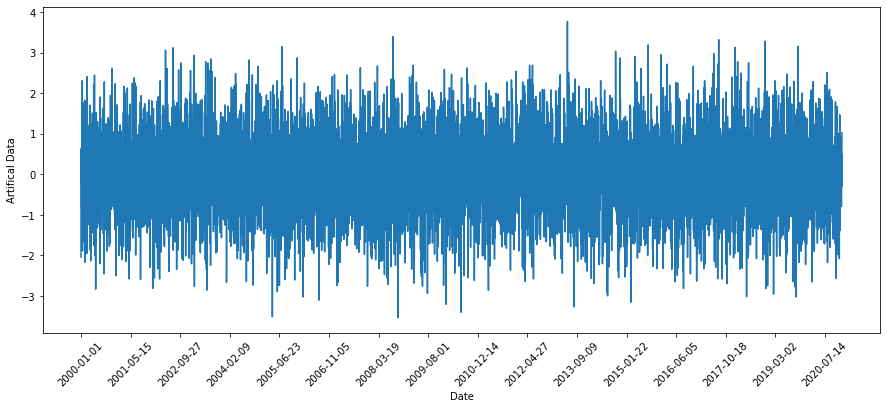

In [34]:
plt.figure(figsize=(15, 6))
plt.plot(series['data'])
x = series.index
plt.xticks(x[::500],rotation=45)
plt.xlabel('Date')
plt.ylabel('Artifical Data')

In [35]:
series.describe()

,data
count,7671.000000
mean,-0.016388
std,1.005979
min,-3.539526
25%,-0.712132
50%,-0.029645
75%,0.673659
max,3.772801


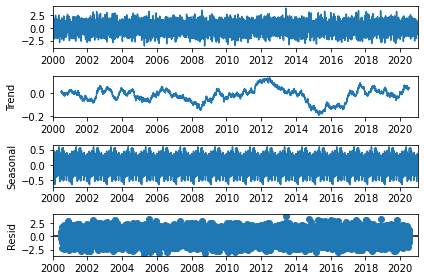

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
# rcParams['figure.figsize'] = 14, 9

result = seasonal_decompose(series,period=365)
result.plot()
plt.show()

### By forcing the method to take a period of 1 year (365 days), we get a trendline. The trend is a simple moving average of the original series with a window length = periods = 365 days, and it seems like a more applicable time-series data. So I extract the trend as our final artificial dataset.

In [37]:
trend = result.trend
trend = trend.dropna()

Text(0, 0.5, 'Artifical Data')

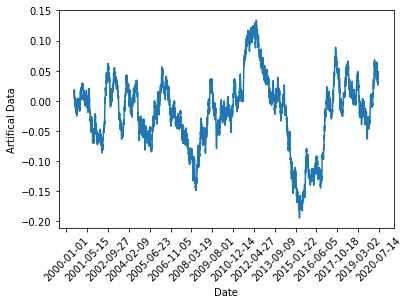

In [38]:
# plt.figure(figsize=(15, 6))
plt.plot(trend)
x = series.index
plt.xticks(x[::500],rotation=45)
plt.xlabel('Date')
plt.ylabel('Artifical Data')

In [39]:
trend.describe()

count    7307.000000
mean       -0.019168
std         0.059379
min        -0.193940
25%        -0.053985
50%        -0.012980
75%         0.016743
max         0.133723
Name: trend, dtype: float64

In [40]:
trend = pd.DataFrame(trend)
trend.to_csv('Artificial_trend.csv')